In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from SubjectiveLogic import Hyperopinion, HyperopinionInterface
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic.BeliefFusion import cumulative_fusion, averaging_fusion, weighted_fusion
from SubjectiveLogic.Trust import trust_discount_2e
from Model import *
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable

In [26]:
NUM_AGENTS = 10
NUM_STEPS = 30

In [27]:
def simulate(initial_configuration: BeliefArray, influence_graph: InfluenceGraph, akv_num_steps=NUM_STEPS, sl_model=NUM_STEPS):
    akv_model = AKVModel(initial_configuration, influence_graph)
    sl_model_cumulative = akv_to_sl(akv_model)
    sl_model_average = akv_to_sl(akv_model)
    sl_model_weighted = akv_to_sl(akv_model)

    akv_model.simulate(akv_num_steps)
    sl_model_cumulative.simulate(sl_model, cumulative_fusion)
    sl_model_average.simulate(sl_model, averaging_fusion)
    sl_model_weighted.simulate(sl_model, weighted_fusion)

    return akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted

# 0.1-Clique

Text(0.5, 1.0, 'SL model\n0.1-clique with uniform\nWeighted fusion')

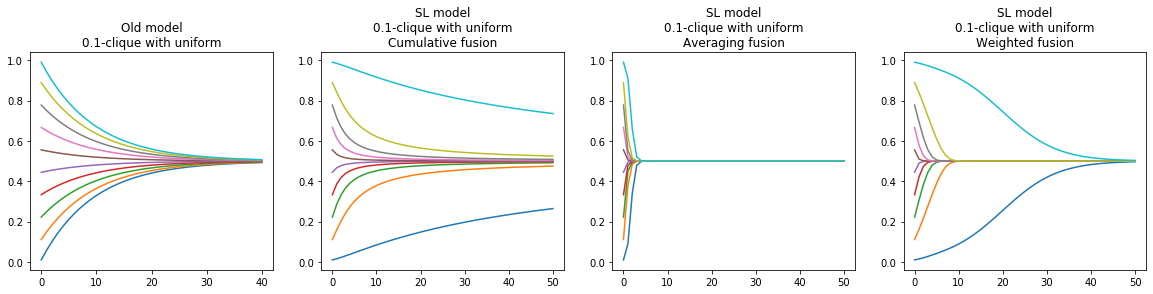

In [28]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 50

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with uniform")
ax[1].set_title("SL model\n0.1-clique with uniform\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with uniform\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with mildly\nWeighted fusion')

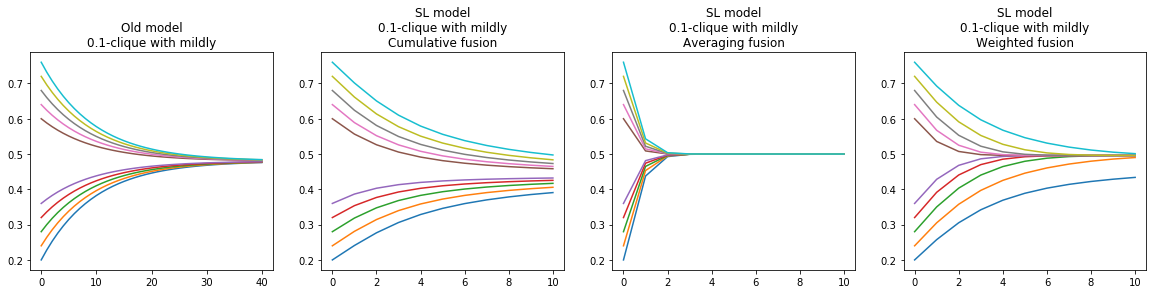

In [29]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with mildly")
ax[1].set_title("SL model\n0.1-clique with mildly\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with mildly\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with extreme\nWeighted fusion')

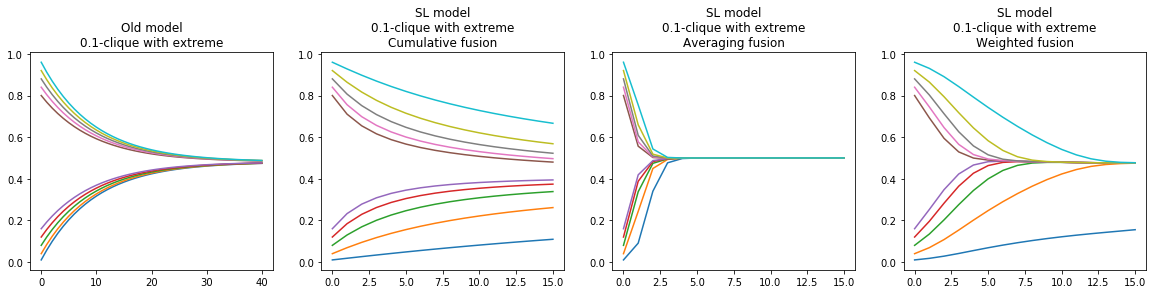

In [30]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with extreme")
ax[1].set_title("SL model\n0.1-clique with extreme\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with extreme\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with tripolar\nWeighted fusion')

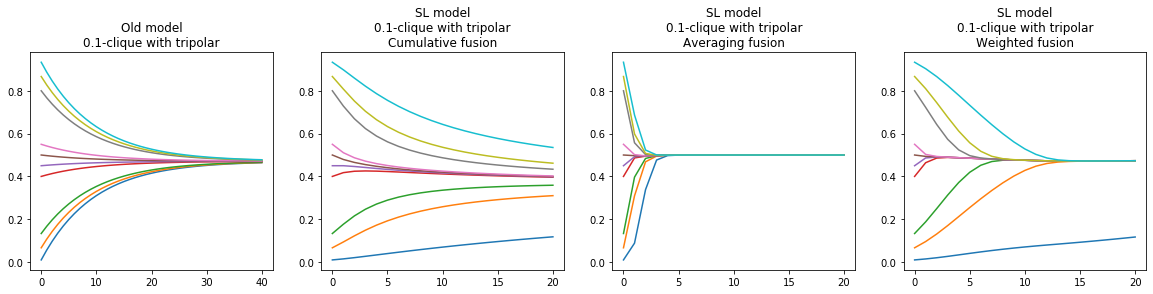

In [31]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 20

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with tripolar")
ax[1].set_title("SL model\n0.1-clique with tripolar\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with tripolar\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with tripolar\nWeighted fusion")

# 0.5-Clique

Text(0.5, 1.0, 'SL model\n0.5-clique with uniform\nWeighted fusion')

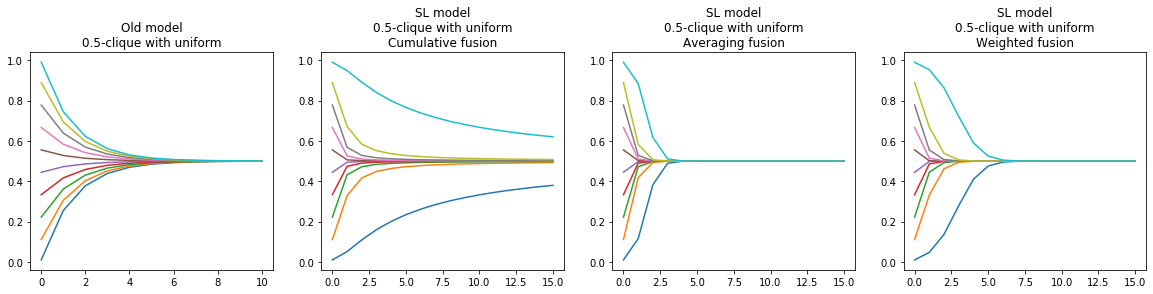

In [32]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with uniform")
ax[1].set_title("SL model\n0.5-clique with uniform\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with uniform\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with mildly\nWeighted fusion')

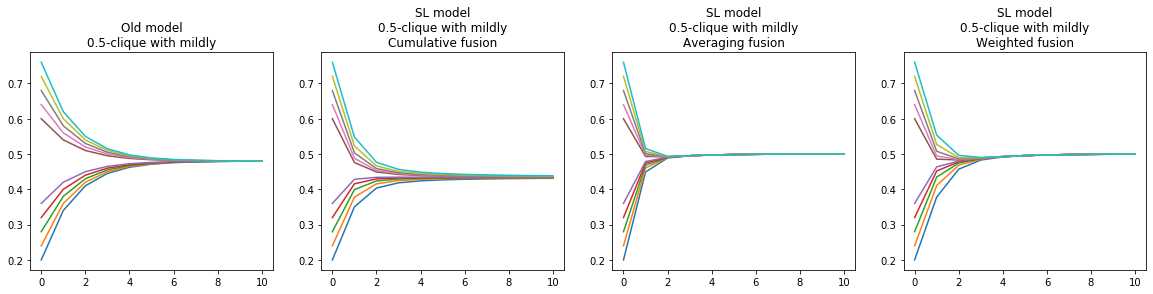

In [33]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with mildly")
ax[1].set_title("SL model\n0.5-clique with mildly\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with mildly\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with extreme\nWeighted fusion')

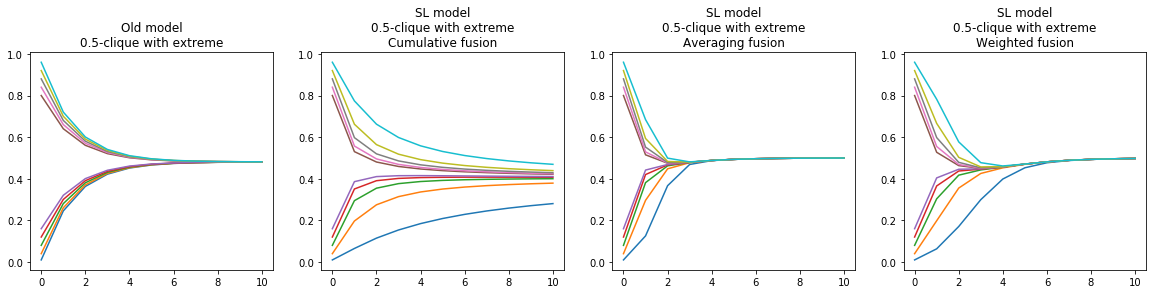

In [34]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with extreme")
ax[1].set_title("SL model\n0.5-clique with extreme\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with extreme\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with tripolar\nWeighted fusion')

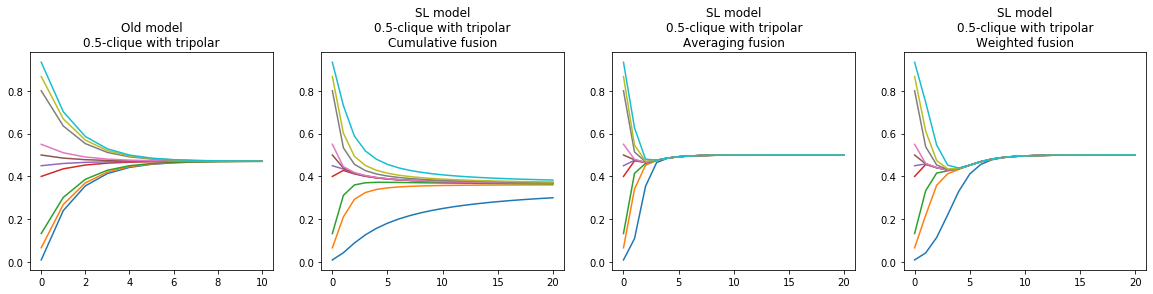

In [35]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 20

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with tripolar")
ax[1].set_title("SL model\n0.5-clique with tripolar\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with tripolar\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with tripolar\nWeighted fusion")

# Circular

Text(0.5, 1.0, 'SL model\ncircular with uniform\nWeighted fusion')

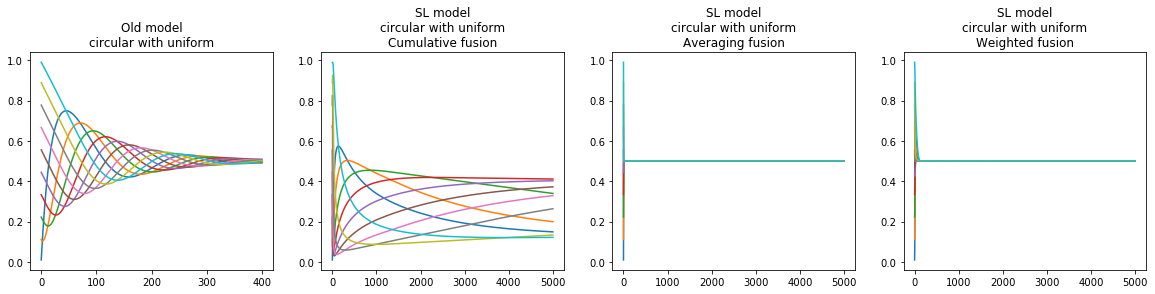

In [47]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with uniform")
ax[1].set_title("SL model\ncircular with uniform\nCumulative fusion")
ax[2].set_title("SL model\ncircular with uniform\nAveraging fusion")
ax[3].set_title("SL model\ncircular with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with mildly\nWeighted fusion')

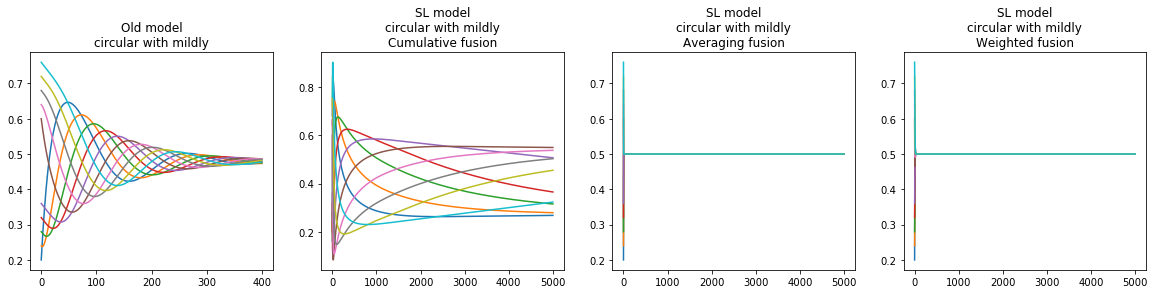

In [48]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with mildly")
ax[1].set_title("SL model\ncircular with mildly\nCumulative fusion")
ax[2].set_title("SL model\ncircular with mildly\nAveraging fusion")
ax[3].set_title("SL model\ncircular with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with extreme\nWeighted fusion')

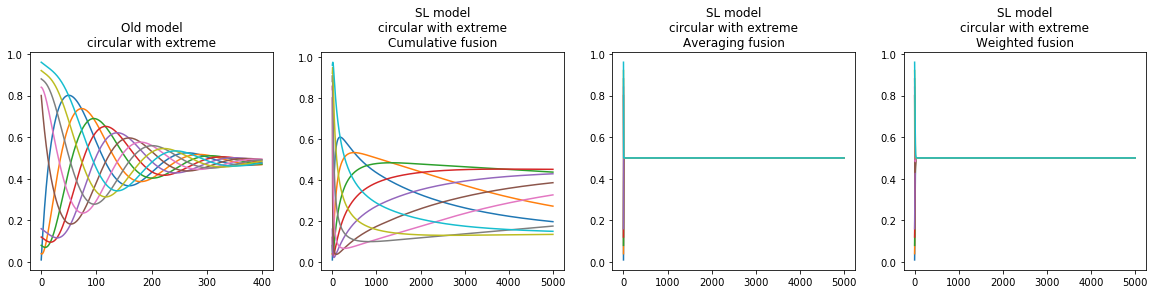

In [49]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with extreme")
ax[1].set_title("SL model\ncircular with extreme\nCumulative fusion")
ax[2].set_title("SL model\ncircular with extreme\nAveraging fusion")
ax[3].set_title("SL model\ncircular with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with tripolar\nWeighted fusion')

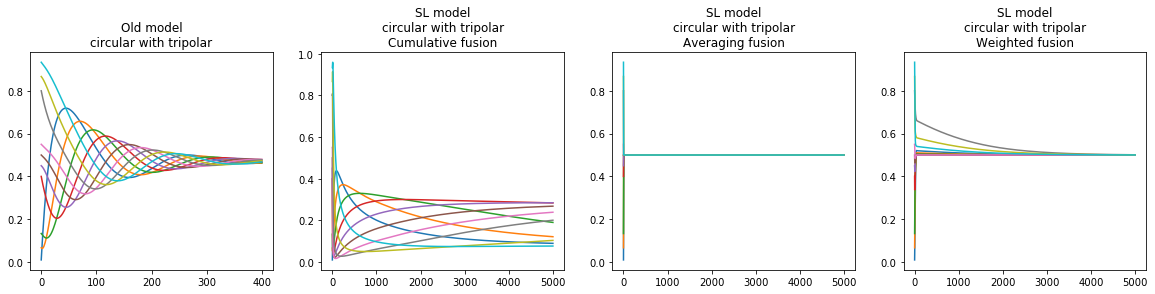

In [50]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5000
NUM_AGENTS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with tripolar")
ax[1].set_title("SL model\ncircular with tripolar\nCumulative fusion")
ax[2].set_title("SL model\ncircular with tripolar\nAveraging fusion")
ax[3].set_title("SL model\ncircular with tripolar\nWeighted fusion")

## Disconected

Text(0.5, 1.0, 'SL model\nDisconnected with uniform\nWeighted fusion')

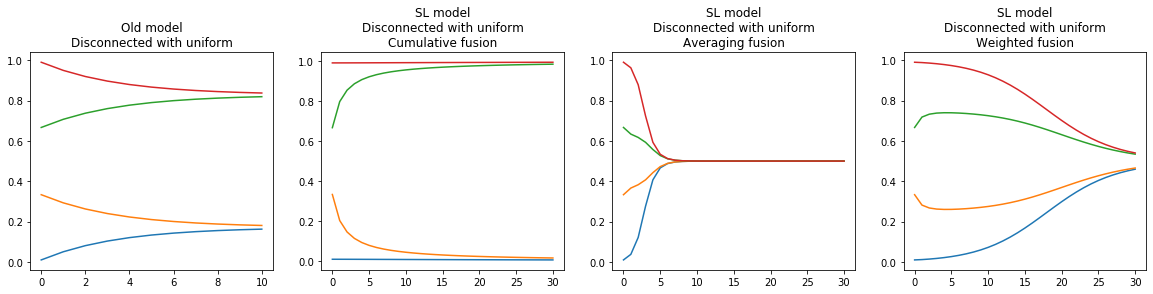

In [40]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 4

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with uniform")
ax[1].set_title("SL model\nDisconnected with uniform\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with uniform\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with uniform\nWeighted fusion")